# S'entraîner (Régression linéaire)
La partie donnant les concepts pour faire ces exercices est [accessible ici](https://pcsi3physiquestan.github.io/intro_python/notebook/np_polyfit.html).

## Exemple simple
On veut mesurer une capacité $C$ d'un condensateur. On étudie pour cela le régime libre d'un circuit RC avec une résistance $R$ variable. On mesure le temps caractéristique $\tau$ pour différente valeur de $R$. On obtient les valeurs suivantes :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

R = np.array([100, 150, 200, 250, 300, 350, 400, 450, 500])
tau = np.array([164, 196, 275, 294, 354, 396, 481, 497, 558])

donnees = pd.DataFrame(
    {
        "R(Ohm)": ["{:.2f}".format(val) for val in R],
        "tau(micro s)": ["{:.2f}".format(val) for val in tau],
    }
)

donnees.style

,R(Ohm),tau(micro s)
0,100.00,164.00
1,150.00,196.00
2,200.00,275.00
3,250.00,294.00
4,300.00,354.00
5,350.00,396.00
6,400.00,481.00
7,450.00,497.00
8,500.00,558.00


Un bilan sur les sources d'incertitude amène aux conclusions suivantes :
* l'incertitude sur le temps caratéristique est de 5%
* l'incertitude sur les résistances sont de 2%

````{admonition} Détermination de C
:class: tip
1. Représenter $\tau$ en fonction de R avec les croix d'incertitudes. On utilisera la fonction `errorbar`.
2. Vérifier que le modèle attendu $\tau = RC$ est visuellement possible.
3. Estimer la capacitance $C$ par régression linéaire puis représenter la droite d'ajustement affine.
4. Une méthode qualitative pour vérifier si le modèle est cohérent avec les incertitudes de mesure est de vérifier si la droite d'ajustement passe bien par les barres d'incertitude. Tester ici la cohérence du modèle.
5. La relation étant linéaire, on peut aussi estimer $C$ comme la moyenne des rapport $\frac{\tau}{R}$. Estimer la capacitance de cette manière et vérifier qu'on obtient le même ordre de grandeur.
```{tip}
On rappelle la fonction pour tracer des points de mesures avec des barres d'erreurs :

`errorbar(x, y, xerr=inc_x, yerr=inc_y, options...)`

```
````

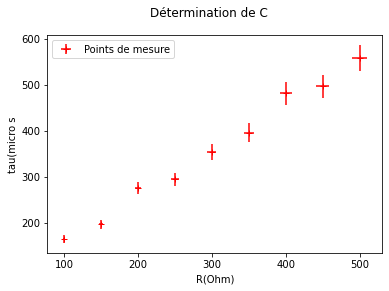

Les points sont plutôt alignés. C'est encourageant pour l'utilisation de la relation tau = RC


In [2]:
"""Importation des bibliothèques"""
import numpy as np
import matplotlib.pyplot as plt

"""Saisie des données"""
R = np.array([100, 150, 200, 250, 300, 350, 400, 450, 500])
tau = np.array([164, 196, 275, 294, 354, 396, 481, 497, 558])

"""Incertitude sur les valeurs"""
uR = R * 0.02
utau = tau * 0.05

"""Création du graphique et analyse des points de mesure"""
f, ax= plt.subplots()
f.suptitle("Détermination de C")
ax.set_xlabel("R(Ohm)")
ax.set_ylabel("tau(micro s")

ax.errorbar(R, tau, xerr=uR, yerr=utau, marker='+', linestyle='', color='red', label="Points de mesure")

ax.legend()
plt.show()
print("Les points sont plutôt alignés. C'est encourageant pour l'utilisation de la relation tau = RC")

----------------
Droite d'ajustement :
tau = 0.9976666666666668* R + 57.922222222222
Il faudrait arrondir en réfléchissant aux chiffres significatifs
----------------


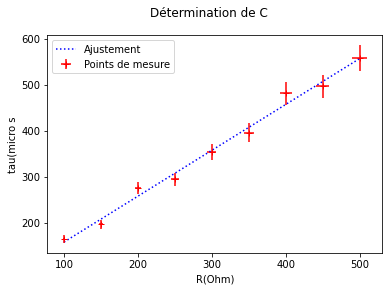

La droite passe globalement par les croix d'incertitude à part les points 2 et 3 pour lesquels il faudrait approfondir l'analyse.


In [3]:
"""Ajustement linéaire"""
p = np.polyfit(R, tau, 1)

tau_adj = p[0] * R + p[1]

print("----------------")
print("Droite d'ajustement :")
print("tau = " + str(p[0]) + "* R + " + str(p[1]))
print("Il faudrait arrondir en réfléchissant aux chiffres significatifs")
print("----------------")


"""Création du graphique et analyse des points de mesure"""
f, ax= plt.subplots()
f.suptitle("Détermination de C")
ax.set_xlabel("R(Ohm)")
ax.set_ylabel("tau(micro s")

ax.plot(R, tau_adj, linestyle=':', color='blue', label="Ajustement")
ax.errorbar(R, tau, xerr=uR, yerr=utau, marker='+', linestyle='', color='red', label="Points de mesure")

ax.legend()
plt.show()

print("La droite passe globalement par les croix d'incertitude à part les points 2 et 3 pour lesquels il faudrait approfondir l'analyse.")

In [4]:
"""Détermination de C par régression linéaire"""
C = p[0] * 1e-6  # Passage en secondes pour tau.
print("----------------")
print("Estimation de C :")
print("C = " + str(C) + " F")
print("Il faudrait arrondir en réfléchissant aux chiffres significatifs.")
print("----------------")

----------------
Estimation de C :
C = 9.976666666666668e-07 F
Il faudrait arrondir en réfléchissant aux chiffres significatifs.
----------------


In [5]:
"""Détermination de C par moyenne des rapports"""
C_s = tau / R * 1e-6  # Calcul des C pour chaque valeur de R
C2 = np.mean(C_s)  # Calcul de la moyenne
print("----------------")
print("Estimation de C par moyenne des rapports :")
print("C = " + str(C2) + " F")
print("Il faudrait arrondir en réfléchissant aux chiffres significatifs.")
print("----------------")

----------------
Estimation de C par moyenne des rapports :
C = 1.2480044091710756e-06 F
Il faudrait arrondir en réfléchissant aux chiffres significatifs.
----------------


```{dropdown} Commentaire sur les valeurs trouvées.
Vous devriez trouver le même ordre de grandeur mais pas la même valeur (plus de 20% d'écart tout de même). Cela peut s'expliquer par :
* les incertitudes qui, si on les estime sont relativement grandes
* un biais dans les mesures : l'ordonnée à l'origine devrait être nulle or la régression linéaire donne une valeur relativement importante (jusqu'à 30% des valeurs mesurées). Le modèle est donc plutôt affine et non linéaire. La méthode des rapports $\tau/R$ n'est donc peut-être pas adaptée. C'est l'avantage de la régression linéaire qui permet de tenir compte d'un possible biais dans les mesures.
```


## Utiliser un modèle ajusté

On veut mesurer la concentration de l'additif alimentaire E131 (bleu patenté) dans des bonbons gélifiées. On réalise pour cela un dosage par absorbance, c'est-à-dire qu'on va mesurer l'absorbance $A_{640nm}$ à la longueur d'onde $640nm$ de plusieurs solutions contenant du bleu de patenté à des concentrations connues $C_i$. En mesurant ensuite l'absorbance d'une solution contenant un bonbon gélifié bleu dissous, on déterminera sa concentration.

> __Fabrication des solutions étalons :__
> 
> On utilise une solution mère de concentration $C_0 = (2.04 \pm 0.01) \times 10^{-5} mol.L^{-1}$. On prélève un volume $V_1$ (inférieur ou égal à 10mL) qu'on complète par un volume $V_2$ d'eau distillée tel que $V_T= V_1 + V_2 = 10mL$. La concentration $C_i$ dans un tube où $V_1 = V_{1i}$ est alors :
>
> $$C_i = C_0 \frac{V_{1i}}{V_T}$$
>
> Le mode opératoire utilisé et l'analyse des sources d'incertitudes amène à une expression de l'incertitude sur $C_i$ :
>
> $$u(C_i) = \frac{C_0 u_i}{V_T} \sqrt{1 + {\left (\frac{C_i}{C_0}\right )}^2}$$
> avec $u_i = 0.1 mL$ (l'incertitude sur la concentration a une influence négligeable).

> __Loi de Beer-Lambert :__
>
> La loi de Beer-Lambert prévoit une relation linéaire entre la concentration d'une solution colorée et l'absorbance de cette solution : 
>
> $$A_{640nm, i} = \alpha_{E131, 640nm} C_i$$
>
> Les mesures d'absorbances seront considérées comme d'incertitude négligeable.

On donne les données mesurées :

In [6]:
Vi = np.array([1, 2.50, 5.00, 7.50, 10.00])
Ai = np.array([0.128, 0.428, 0.833, 1.267, 1.765])

donnees = pd.DataFrame(
    {
        "Vi(mL)": ["{:.2f}".format(val) for val in Vi],
        "A(SI)": ["{:.2f}".format(val) for val in Ai],
    }
)

donnees.style

,Vi(mL),A(SI)
0,1.00,0.13
1,2.50,0.43
2,5.00,0.83
3,7.50,1.27
4,10.00,1.76


````{admonition} Dosage par absorbance
1. Créer deux vecteur numpy contenant les volumes $V_{1i}$ et les absorbances $A_i$ puis obtenir deux vecteurs numpy contenant les concentration $C_i$ et les incertitudes $u(C_i)$.
2. Représenter graphiquement $C_i$ en fonction de $A_i$ et vérifier que le modèle linéaire proposé par la loi de Beer-Lambert n'est pas aberrant. _On utilisera la fonction `errorbar` pour représenter les barres d'incertitudes associées aux concentrations_.
3. Réaliser une régression linéaire sans tenir compte des incertitudes sur les concentrations et tracer la droite d'ajustement affine sur le même graphique que précédemment. (_Supprimer le `plt.show()` précédent_).
4. Une méthode qualitative pour vérifier si le modèle est cohérent avec les incertitudes de mesure est de vérifier si la droite d'ajustement passe bien par les barres d'incertitude. Tester ici la cohérence du modèle.
5. On dilue un bonbon dans de l'eau diluée de sorte que le volume de liquide (avec le bonbon) soit $V_f = 50.00 mL$. On mesure alors l'absorbance de la solution ainsi réalisée, on obtient $A_{649nm, f} = 0.665 SI$. Utiliser Python comme calculatrice et les données du modèle ajusté pour déterminer la quantité maximale de bonbons bleus qu'on peut manger par jour sans dépasser la DJA (Dose journalière admissible) de l'additif E131 qui est de 2.5mg par kg de masse corporelle. On donne la masse molaire du bleu patenté $M = 582,66 g.mol^{-1}$.

```{note}
Le nombre de bonbon trouvé ne tient pas compte de la quantité de sucre ingurgitée...
```


````

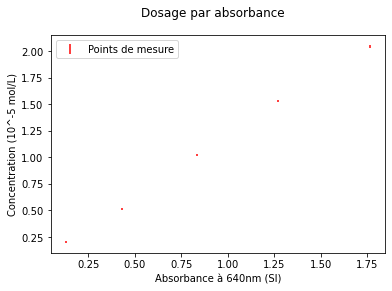

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Vi = np.array([1, 2.50, 5.00, 7.50, 10.00])
Ai = np.array([0.128, 0.428, 0.833, 1.267, 1.765])

Vt = 10  # V_T en mL
C0 = 2.04  # On n'introduit pas la puissance 10^-5
u1 = 0.05  # Incertitude sur les volumes en mL

"""Calcul des Ci et uCi. On utilise la vectorialisation des vecteurs numpy"""
Ci = C0 * Vi / Vt  # Calcul des Ci, on n'introduit pas la puissance 10^-5
uCi = C0 * u1 / Vt * np.sqrt(1 + (Ci / C0) ** 2)  # Calcul des uCi


"""Tracé des points de mesures"""
f, ax = plt.subplots()
f.suptitle("Dosage par absorbance")
ax.set_xlabel("Absorbance à 640nm (SI)")
ax.set_ylabel("Concentration (10^-5 mol/L)")

ax.errorbar(Ai, Ci, yerr=uCi, label="Points de mesure", linestyle='', color='red')

ax.legend()

plt.show()  # A commenter si on veut afficher le graphique suivant.

Le tracé précédent rend l'hypothèse linéaire possible.
On réalise donc l'ajustement.
-------------------
Le modèle ajusté a pour équation :
1.139855247404751 * A + 0.05293999024471903
Il faudra bien sûr réfléchir au nombre de chiffres significatifs à garder
-------------------


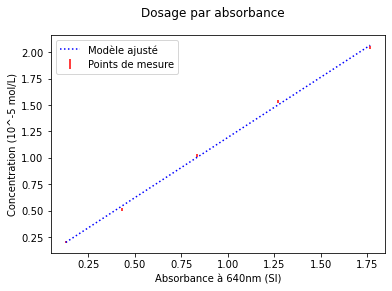

In [8]:
print("Le tracé précédent rend l'hypothèse linéaire possible.")
print("On réalise donc l'ajustement.")

p = np.polyfit(Ai, Ci, 1)  # Réalisation de l'ajustement affine

print("-------------------")
print("Le modèle ajusté a pour équation :")
print(str(p[0]) + " * A + " + str(p[1]))
print("Il faudra bien sûr réfléchir au nombre de chiffres significatifs à garder")
print("-------------------")

Ci_adj = p[0] * Ai + p[1]  # On calcule les valeurs ajustées des concentrations.

ax.plot(Ai, Ci_adj, label="Modèle ajusté", linestyle=':', color='blue')

ax.legend()  # Il faut réafficher la légende car on l'a modifiée


f  # Inutile sauf avec un notebook Jupyter
# plt.show() A décommenter si on n'utiliser pas Jupyter

In [9]:
"""Le modèle étant plutôt cohérent avec les points de mesures, on va l'utiliser pour évaluer Cf"""
Af = 0.665
Cf = p[0] * Af + p[1]  # Concentration en bleu patenté dans la solution diluée

Vf = 50e-3  # Volume de la solution diluée (en L)
M = 582.66e-3  # Masse molaire du bleu patenté (en kg)
"""Pour calculer la masse, on oublier la puissance 10^-5 dans la concentration"""
mf = Cf * 1e-5 * Vf * M  # Calcul de la masse de bleu patenté dans un bonbon (en kg)


Mh = 70  # On choisit un humain de 70kg
m_DJA = 2.5e-6  # DJA donnée par l'énoncé
m_max = Mh * m_DJA  # Masse maximale de bleu patenté qu'on peut ingérer
N_max = np.ceil(m_max / mf)  # Arrondi à l'entier supérieur

print("---------------")
print("Le nombre maximal de bonbons qu'on peut manger est :")
print(N_max)
print("---------------")

---------------
Le nombre maximal de bonbons qu'on peut manger est :
741.0
---------------
